In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [65]:
pd.set_option('display.max_columns', None)

In [66]:
# read in player_stats_with_network.parquet
ncaa_players = pd.read_parquet('player_stats_with_network.parquet')

ncaa_players.head()

,role,number,player,ht,wt,yr,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,category,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,group_rank,team,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,transfer,prev_team,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,team_display_name
0,Major Contributor,2.0,Julian Champagnie,6-8,215.0,Jr,31.0,82.5,105.4,25.5,30.3,47.5,50.7,4.1,10.9,10.9,9.2,3.5,3.1,1.8,4.0,21.4,89.0,114.0,0.781,156.0,341.0,0.457,65.0,193.0,0.337,All Games,19.0,NaN,299.0,8.0,NaN,NaN,NaN,NaN,NaN,45.0,302.0,169.0,11.0,NaN,NaN,406.0,NaN,NaN,National Rank,St. John's,2022,45689.0,7.7,-5.6,-0.4,0.9,-3.7,-5.7,-1.2,3.0,3.0,-2.8,0.3,0.7,-0.3,-0.6,-8.6,-0.106,-0.014,-0.043,False,St. John's,1.297371,3.729506,5.026877,24.906250,797.0,34.218750,1095.0,32.0,32.0,2599.0,St. John's Red Storm
1,Significant Contributor,0.0,Posh Alexander,6-0,200.0,So,29.0,71.8,113.4,23.2,20.0,52.0,55.7,8.5,29.0,29.3,17.5,0.6,3.9,2.1,4.1,35.2,80.0,108.0,0.741,140.0,247.0,0.567,13.0,60.0,0.217,All Games,NaN,348.0,NaN,NaN,NaN,466.0,333.0,NaN,8.0,NaN,NaN,44.0,27.0,49.0,381.0,NaN,316.0,NaN,National Rank,St. John's,2022,49928.0,0.8,9.8,2.9,0.8,2.4,3.7,3.5,5.0,5.2,-2.4,0.5,-0.6,-0.8,1.3,13.8,0.016,0.052,-0.082,False,St. John's,1.105729,3.283223,4.388952,23.966667,719.0,32.000000,960.0,26.0,30.0,2599.0,St. John's Red Storm
2,Significant Contributor,5.0,Dylan AddaeWusu,6-4,235.0,So,32.0,61.0,101.5,20.3,17.3,51.1,52.6,3.9,25.5,25.5,22.6,0.9,2.8,3.6,3.3,29.2,40.0,66.0,0.606,60.0,129.0,0.465,37.0,97.0,0.381,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,267.0,NaN,NaN,NaN,NaN,NaN,321.0,National Rank,St. John's,2022,50232.0,10.9,6.3,0.3,0.6,1.1,0.6,-1.5,6.5,5.8,-3.0,0.3,0.6,-1.7,0.1,-3.0,-0.011,-0.098,0.110,False,St. John's,0.495921,2.298377,2.794298,15.575758,514.0,25.090909,828.0,16.0,33.0,2599.0,St. John's Red Storm
3,Role Player,23.0,Montez Mathis,6-4,210.0,Sr,32.0,60.5,98.3,18.5,18.9,44.9,47.3,4.5,12.6,12.6,14.2,0.8,2.4,3.7,3.3,28.2,43.0,69.0,0.623,89.0,192.0,0.464,14.0,53.0,0.264,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,St. John's,2022,42323.0,8.1,6.7,-5.2,-6.7,1.7,1.9,-0.9,5.4,5.4,1.6,-0.7,0.5,-0.8,-0.9,-2.4,0.049,0.038,-0.033,True,Rutgers,0.831166,2.265116,3.096283,13.937500,446.0,24.468750,783.0,28.0,32.0,2599.0,St. John's Red Storm
4,Role Player,1.0,Aaron Wheeler,6-9,205.0,Sr,31.0,53.0,110.1,19.7,21.4,56.8,57.9,4.2,11.3,11.3,14.8,4.7,1.3,4.2,3.1,22.2,35.0,54.0,0.648,75.0,134.0,0.560,42.0,109.0,0.385,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,356.0,284.0,National Rank,St. John's,2022,40047.0,7.5,13.1,5.7,7.6,9.3,9.2,-1.5,1.1,1.1,-6.9,1.4,-0.7,0.1,0.8,-0.8,0.083,-0.051,0.119,True,Purdue,0.685434,1.934768,2.620202,13.500000,405.0,22.733333,682.0,16.0,30.0,2599.0,St. John's Red Storm


In [67]:
# view all columns in the dataset
ncaa_players.columns

Index(['role', 'number', 'player', 'ht', 'wt', 'yr', 'g', 'min_pct', 'o_rtg',
       'poss_pct', 'shots_pct', 'e_fg_pct', 'ts_pct', 'or_pct', 'dr_pct',
       'a_rate', 'to_rate', 'blk_pct', 'stl_pct', 'f_cper40', 'f_dper40',
       'ft_rate', 'ftm', 'fta', 'ft_pct', 'fgm_2', 'fga_2', 'fg_2_pct',
       'fgm_3', 'fga_3', 'fg_3_pct', 'category', 'min_pct_rk', 'o_rtg_rk',
       'poss_pct_rk', 'shots_pct_rk', 'e_fg_pct_rk', 'ts_pct_rk', 'or_pct_rk',
       'dr_pct_rk', 'a_rate_rk', 'to_rate_rk', 'blk_pct_rk', 'stl_pct_rk',
       'f_cper40_rk', 'f_dper40_rk', 'ft_rate_rk', 'ft_pct_rk', 'fg_2_pct_rk',
       'fg_3_pct_rk', 'group_rank', 'team', 'year', 'player_id',
       'diff_min_pct', 'diff_o_rtg', 'diff_poss_pct', 'diff_shots_pct',
       'diff_e_fg_pct', 'diff_ts_pct', 'diff_or_pct', 'diff_dr_pct',
       'diff_a_rate', 'diff_to_rate', 'diff_blk_pct', 'diff_stl_pct',
       'diff_f_cper40', 'diff_f_dper40', 'diff_ft_rate', 'diff_ft_pct',
       'diff_fg_2_pct', 'diff_fg_3_pct', 'tran

In [68]:
# drop unneccessary columns
new_df = ncaa_players.drop(columns =['role', 'number', 'player', 'ht', 'wt', 'yr', 'g', 'min_pct', 'o_rtg',
       'shots_pct', 'e_fg_pct', 'or_pct', 'dr_pct',
       'to_rate', 'blk_pct', 'stl_pct', 'f_cper40', 'f_dper40',
       'ft_rate', 'ftm', 'fta', 'ft_pct', 'fgm_2', 'fga_2', 'fg_2_pct',
       'fgm_3', 'fga_3', 'fg_3_pct', 'category', 'min_pct_rk', 'o_rtg_rk',
       'poss_pct_rk', 'shots_pct_rk', 'e_fg_pct_rk', 'ts_pct_rk', 'or_pct_rk',
       'dr_pct_rk', 'a_rate_rk', 'to_rate_rk', 'blk_pct_rk', 'stl_pct_rk',
       'f_cper40_rk', 'f_dper40_rk', 'ft_rate_rk', 'ft_pct_rk', 'fg_2_pct_rk',
       'fg_3_pct_rk', 'group_rank', 'team', 'year',
       'diff_min_pct', 'diff_o_rtg', 'diff_poss_pct', 'diff_shots_pct',
       'diff_e_fg_pct', 'diff_ts_pct', 'diff_or_pct', 'diff_dr_pct',
       'diff_a_rate', 'diff_to_rate', 'diff_blk_pct', 'diff_stl_pct',
       'diff_f_cper40', 'diff_f_dper40', 'diff_ft_rate', 'diff_ft_pct',
       'diff_fg_2_pct', 'diff_fg_3_pct', 'transfer', 'prev_team', 'total_possessions',
       'total_minutes', 'total_starts', 'total_games',
       'team_id', 'team_display_name', 'poss_pct','ts_pct','a_rate'])

In [69]:
# set player_id as the index and fill N/As with 0
new_df.set_index('player_id', inplace = True)
new_df.fillna(0, inplace = True)

In [70]:
new_df.head()

,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,avg_minutes
player_id,,,,,
45689.0,1.297371,3.729506,5.026877,24.906250,34.218750
49928.0,1.105729,3.283223,4.388952,23.966667,32.000000
50232.0,0.495921,2.298377,2.794298,15.575758,25.090909
42323.0,0.831166,2.265116,3.096283,13.937500,24.468750
40047.0,0.685434,1.934768,2.620202,13.500000,22.733333


In [71]:
# scale the dataset using StandardScaler
scaled_players = StandardScaler().fit_transform(new_df)
scaled_players

array([[ 4.12616207,  3.88596086,  4.04336356,  2.65405277,  1.50525546],
       [ 3.37592055,  3.30939195,  3.40834157,  2.51203637,  1.28490309],
       [ 0.9886434 ,  2.0370344 ,  1.82094525,  1.24376495,  0.59873539],
       ...,
       [-0.94005245, -0.9323222 , -0.95739814, -0.75420586, -0.25445997],
       [-0.93920138, -0.91100691, -0.94075809, -0.67166636,  0.68581695],
       [-0.94512877, -0.91965616, -0.94892963, -0.85264276, -0.14638325]],
      shape=(12727, 5))

In [72]:
# fit PCA model on scaled dataset
pca = PCA(n_components = 3, random_state=0).fit(scaled_players)

In [73]:
# the 3 Principal Components explain 98.96% of tthe variance found in the dataset
print(pca.explained_variance_ratio_ * 100)
print(f'Total Explained Variance: {sum(pca.explained_variance_ratio_ * 100):.2f}%')

[81.79452535 13.96386748  3.19730369]
Total Explained Variance: 98.96%


In [74]:
# plot heatmap of the principal component loadings
def plot_PCA(pca):
    feature_list = list(new_df.columns)

    pc_names = []

    for i in range(1,4):
        pc_names.append(f'PC{i}')

    fig, ax = plt.subplots(figsize=(10,15))

    plt.imshow(pca.components_, interpolation='none', cmap='plasma')
    plt.xticks(np.arange(0, len(feature_list), 1), feature_list, rotation = 90, fontsize = 10)
    plt.yticks(np.arange(0,3,1), pc_names, fontsize = 10)
    plt.tight_layout()
    plt.title("Principal Component Loadings for NCAA Men's Basketball")
    plt.colorbar(shrink = .25)
    return

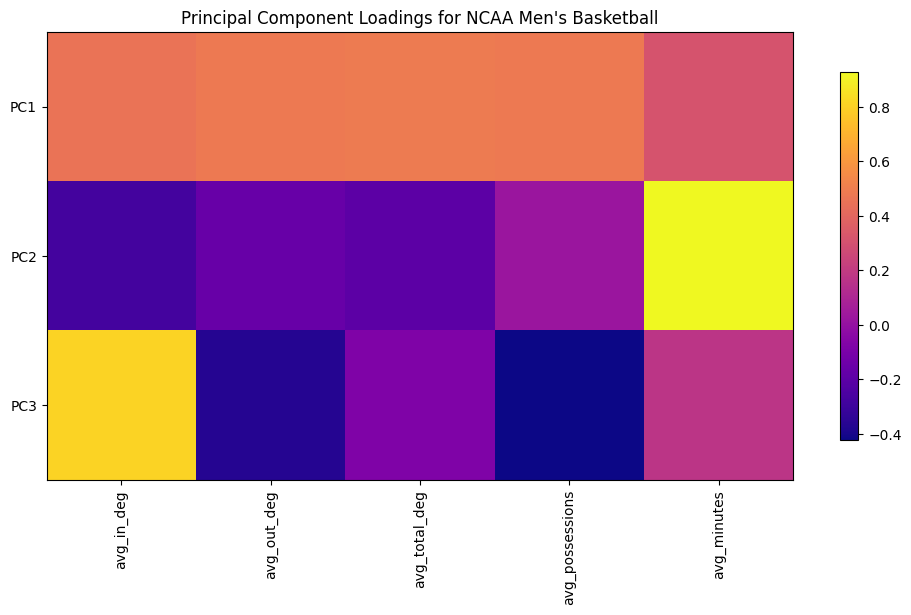

In [75]:
plot_PCA(pca)

In [76]:
# describe the most important features for each principal component
for ind, feat in enumerate(abs(pca.components_), start = 1):
    x = max(feat)
    max_index = list(feat).index(x)

    print(f'Most important feature for PC{ind}: {list(new_df.columns)[max_index]} - {x * 100:.2f}% of component explained')

Most important feature for PC1: avg_total_deg - 48.61% of component explained
Most important feature for PC2: avg_minutes - 92.66% of component explained
Most important feature for PC3: avg_in_deg - 80.68% of component explained


In [77]:
# fit & transform dataset using the PCA model
pca_data = PCA(n_components = 3, random_state=0).fit_transform(scaled_players)
pca_data

array([[ 7.44695867, -1.10911516,  0.70905077],
       [ 6.3840212 , -0.89127432,  0.3894794 ],
       [ 3.09608298, -0.37863549, -0.52199048],
       ...,
       [-1.78103296,  0.34610617, -0.06328629],
       [-1.43045482,  1.2122231 ,  0.05200373],
       [-1.78673099,  0.4417534 , -0.01293936]], shape=(12727, 3))

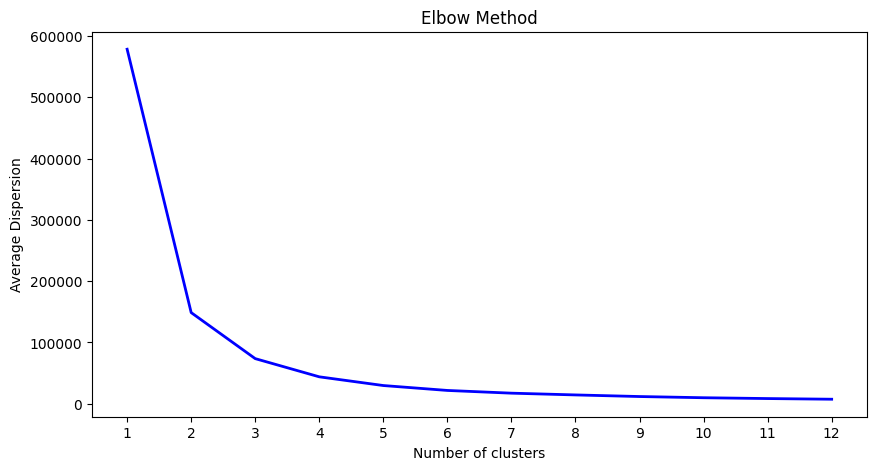

In [78]:
# use elbow method to select the number of clusters to use for KMeans clustering
avg_dis = []
for i in range(1, 13):
    k = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    k.fit(new_df.iloc[:,:-1])
    avg_dis.append(k.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,13), avg_dis, linewidth = 2, color = 'blue')
plt.xticks(np.arange(1,13,1))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Average Dispersion')
plt.show()

In [79]:
# create KMeans clustering model 
kmeans = KMeans(n_clusters = 4, max_iter = 1000,init ='k-means++', random_state = 0)
clusters = kmeans.fit_predict(pca_data)

In [80]:
# describe model performance using Silhouette Score, Davies-Bouldin Score, and Calinski-Harabasz Score
sil_avg = silhouette_score(scaled_players, clusters)
db_score = davies_bouldin_score(scaled_players, clusters)
ch_score = calinski_harabasz_score(scaled_players, clusters)

print(f'The average silhouette score with 4 clusters is: {sil_avg}')
print(f'The Davies-Bouldin score with 4 clusters is : {db_score}')
print(f'The Calinski-Harabasz score with 4 clusters is: {ch_score}')

The average silhouette score with 4 clusters is: 0.4380244532168255
The Davies-Bouldin score with 4 clusters is : 0.769081410091521
The Calinski-Harabasz score with 4 clusters is: 18071.748955009454


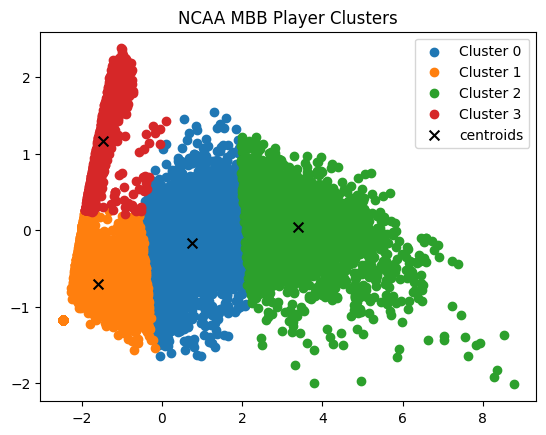

In [ ]:
# plot the clusters found in the pca_data 
unique_labels = np.unique(clusters)
for label in unique_labels:
    plt.scatter(pca_data[clusters == label, 0], pca_data[clusters == label, 1], label = f'Cluster {label}')
    
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s =50, c = 'black', marker = 'x', label = 'centroids')
plt.title('NCAA MBB Player Clusters')
plt.legend()
plt.show()

In [ ]:
# add the clusters back to our original dataset
ncaa_players.loc[:, 'cluster'] = clusters
ncaa_players.head()

,role,number,player,ht,wt,yr,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,category,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,group_rank,team,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,transfer,prev_team,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,team_display_name,cluster
0,Major Contributor,2.0,Julian Champagnie,6-8,215.0,Jr,31.0,82.5,105.4,25.5,30.3,47.5,50.7,4.1,10.9,10.9,9.2,3.5,3.1,1.8,4.0,21.4,89.0,114.0,0.781,156.0,341.0,0.457,65.0,193.0,0.337,All Games,19.0,NaN,299.0,8.0,NaN,NaN,NaN,NaN,NaN,45.0,302.0,169.0,11.0,NaN,NaN,406.0,NaN,NaN,National Rank,St. John's,2022,45689.0,7.7,-5.6,-0.4,0.9,-3.7,-5.7,-1.2,3.0,3.0,-2.8,0.3,0.7,-0.3,-0.6,-8.6,-0.106,-0.014,-0.043,False,St. John's,1.297371,3.729506,5.026877,24.906250,797.0,34.218750,1095.0,32.0,32.0,2599.0,St. John's Red Storm,2
1,Significant Contributor,0.0,Posh Alexander,6-0,200.0,So,29.0,71.8,113.4,23.2,20.0,52.0,55.7,8.5,29.0,29.3,17.5,0.6,3.9,2.1,4.1,35.2,80.0,108.0,0.741,140.0,247.0,0.567,13.0,60.0,0.217,All Games,NaN,348.0,NaN,NaN,NaN,466.0,333.0,NaN,8.0,NaN,NaN,44.0,27.0,49.0,381.0,NaN,316.0,NaN,National Rank,St. John's,2022,49928.0,0.8,9.8,2.9,0.8,2.4,3.7,3.5,5.0,5.2,-2.4,0.5,-0.6,-0.8,1.3,13.8,0.016,0.052,-0.082,False,St. John's,1.105729,3.283223,4.388952,23.966667,719.0,32.000000,960.0,26.0,30.0,2599.0,St. John's Red Storm,2
2,Significant Contributor,5.0,Dylan AddaeWusu,6-4,235.0,So,32.0,61.0,101.5,20.3,17.3,51.1,52.6,3.9,25.5,25.5,22.6,0.9,2.8,3.6,3.3,29.2,40.0,66.0,0.606,60.0,129.0,0.465,37.0,97.0,0.381,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,267.0,NaN,NaN,NaN,NaN,NaN,321.0,National Rank,St. John's,2022,50232.0,10.9,6.3,0.3,0.6,1.1,0.6,-1.5,6.5,5.8,-3.0,0.3,0.6,-1.7,0.1,-3.0,-0.011,-0.098,0.110,False,St. John's,0.495921,2.298377,2.794298,15.575758,514.0,25.090909,828.0,16.0,33.0,2599.0,St. John's Red Storm,2
3,Role Player,23.0,Montez Mathis,6-4,210.0,Sr,32.0,60.5,98.3,18.5,18.9,44.9,47.3,4.5,12.6,12.6,14.2,0.8,2.4,3.7,3.3,28.2,43.0,69.0,0.623,89.0,192.0,0.464,14.0,53.0,0.264,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,St. John's,2022,42323.0,8.1,6.7,-5.2,-6.7,1.7,1.9,-0.9,5.4,5.4,1.6,-0.7,0.5,-0.8,-0.9,-2.4,0.049,0.038,-0.033,True,Rutgers,0.831166,2.265116,3.096283,13.937500,446.0,24.468750,783.0,28.0,32.0,2599.0,St. John's Red Storm,2
4,Role Player,1.0,Aaron Wheeler,6-9,205.0,Sr,31.0,53.0,110.1,19.7,21.4,56.8,57.9,4.2,11.3,11.3,14.8,4.7,1.3,4.2,3.1,22.2,35.0,54.0,0.648,75.0,134.0,0.560,42.0,109.0,0.385,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,356.0,284.0,National Rank,St. John's,2022,40047.0,7.5,13.1,5.7,7.6,9.3,9.2,-1.5,1.1,1.1,-6.9,1.4,-0.7,0.1,0.8,-0.8,0.083,-0.051,0.119,True,Purdue,0.685434,1.934768,2.620202,13.500000,405.0,22.733333,682.0,16.0,30.0,2599.0,St. John's Red Storm,2


In [ ]:
# generate descriptive statistics for each cluster for comparison
clus_0 = ncaa_players[ncaa_players['cluster'] == 0]
clus_0.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,3491.000000,3420.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,57.000000,392.000000,94.000000,129.000000,240.000000,200.000000,461.000000,393.000000,238.000000,412.000000,483.000000,366.000000,313.000000,190.000000,183.000000,155.000000,437.000000,380.000000,3491.000000,3491.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.0
mean,13.830708,203.642105,26.734746,42.956918,100.366829,17.632999,17.764566,49.791349,52.346491,5.278058,10.114093,10.180178,18.545861,2.001432,1.749957,3.828645,2.985649,31.557834,27.246921,39.508164,0.680001,40.402750,80.706674,0.490787,17.508737,52.369522,0.270480,282.385965,213.645408,277.468085,285.077519,209.233333,206.095000,238.802603,244.315522,264.256303,208.953883,225.422360,231.213115,235.635783,264.647368,211.092896,248.703226,215.025172,218.373684,2022.505299,47801.443426,3.713858,3.515416,-0.396228,-0.184420,1.312136,1.284543,0.018409,-0.074375,-0.080443,-1.057647,0.019065,0.020459,-0.160722,-0.107626,-1.345141,0.027936,0.006487,0.013400,0.356971,0.990942,1.347913,9.547780,260.946434,19.823036,546.743626,12.399313,26.929533,1757.288456,0.0
std,12.396933,23.555911,6.614484,17.288295,12.710714,3.872064,4.666027,8.249097,7.322051,3.801177,5.894119,5.968999,5.755019,2.278635,0.828913,1.412023,0.971383,18.829030,17.969292,24.483844,0.150016,25.444629,46.110760,0.106577,16.709232,44.962402,0.146928,157.693617,150.597223,149.755622,143.746609,161.836052,156.017606,154.253680,153.958059,149.500820,149.339097,152.093345,151.298882,153.877995,159.101734,149.915130,160.750277,151.182030,155.427922,0.500044,4025.785676,23.411582,16.187783,3.822264,4.413315,10.748491,9.763767,2.477254,4.925869,4.944716,7.002151,1.495693,0.890965,1.309005,1.001885,19.963746,0.192912,0.133659,0.169855,0.127296,0.279678,0.343306,2.885480,107.686581,5.425081,221.408727,10.609254,7.016899,6322.197612,0.0
min,0.000000,140.000000,3.000000,2.100000,40.900000,6.500000,2.800000,0.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2022.000000,31085.000000,-75.900000,-67.800000,-18.000000,-23.500000,-61.500000,-63.000000,-15.600000,-26.300000,-26.100000,-46.300000,-17.400000,-5.800000,-7.500000,-6.700000,-203.000000,-0.860000,-0.666000,-0.999000,0.051947,0.240666,0.353997,3.352941,14.000000,4.555556,28.000000,0.000000,4.000000,2.000000,0.0
25%,3.000000,185.000000,24.000000,31.450000,92.500000,15.100000,14.600000,44.600000,47.95000

In [84]:
clus_1 = ncaa_players[ncaa_players['cluster'] == 1]
clus_1.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,3992.000000,3860.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,57.000000,41.000000,62.000000,51.000000,39.000000,45.000000,58.000000,46.000000,68.000000,48.000000,63.000000,71.000000,65.000000,70.000000,64.000000,56.000000,42.000000,50.000000,3992.000000,3992.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.00000,1842.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,3992.0
mean,15.758267,205.538601,19.734719,16.846743,91.328732,16.202455,15.506538,45.257340,47.672069,5.697345,8.149098,8.206162,21.169213,2.139529,1.627079,4.690531,2.758918,37.508066,10.372244,15.735721,0.568191,15.047595,31.067635,0.456404,5.669339,18.495992,0.206573,232.842105,233.292683,226.403226,228.823529,249.743590,279.844444,198.551724,246.217391,251.735294,267.020833,231.063492,234.352113,228.953846,225.357143,244.453125,242.392857,237.000000,234.320000,2023.008016,50293.991483,-8.242128,-0.328502,-0.620630,-0.773453,-1.156026,-0.928502,-0.051194,-0.224539,-0.224430,-0.225081,0.049837,0.046145,0.123833,-0.148263,1.739631,-0.011972,-0.01037,-0.006890,0.122603,0.329822,0.452425,3.528645,60.079502,10.079117,155.838922,1.217767,14.814380,1515.713101,1.0
std,12.707548,25.068402,8.384611,15.584926,20.890167,4.995176,6.295363,14.567555,12.952369,4.658549,6.225600,6.296479,10.179255,2.698716,1.170339,2.204935,1.242773,47.415368,16.767567,22.698707,0.278637,20.966206,41.685702,0.184299,10.224093,28.898053,0.190043,150.168452,153.059832,150.547793,165.574359,160.699576,152.381095,148.855891,161.551356,153.238144,171.313262,139.963921,172.674764,155.242998,135.778703,162.629087,162.704940,166.932585,163.536358,0.828541,3809.662002,22.588035,23.791942,4.700515,5.318773,17.089280,15.359863,3.766820,5.649760,5.697276,10.942037,2.268942,1.244804,2.033420,1.361542,49.261883,0.336647,0.20888,0.210539,0.096534,0.238209,0.318150,1.658480,49.494819,3.235915,107.856365,2.725374,7.888077,4279.621387,0.0
min,0.000000,140.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,4.000000,19.000000,1.000000,3.000000,2.000000,2.000000,2.000000,5.000000,3.000000,5.000000,2.000000,4.000000,5.000000,4.000000,2022.000000,30428.000000,-85.800000,-112.500000,-21.400000,-27.400000,-85.700000,-67.300000,-20.900000,-25.200000,-26.100000,-50.700000,-11.900000,-8.700000,-11.700000,-11.700000,-416.700000,-0.999000,-0.99900,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,1.909091,12.000000,0.000000,4.000000,2.000000,1.0
25%,4.000000,185.000000,13.000000,5.700000,79.500000,12.900000,11.300000,37.500000,40.800000,2.200000,3.900

In [85]:
clus_2 = ncaa_players[ncaa_players['cluster'] == 2]
clus_2.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,2363.000000,2334.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.00000,2363.000000,2363.000000,2363.000000,902.000000,589.000000,862.000000,836.000000,738.000000,771.000000,503.000000,575.000000,712.000000,556.000000,476.000000,590.000000,641.000000,767.000000,775.000000,808.000000,546.000000,591.000000,2363.000000,2363.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.0
mean,11.789674,202.558269,29.156581,69.491240,105.249090,22.659882,23.186754,50.981337,54.409649,4.752857,15.466102,15.559839,16.793610,1.725349,1.988405,2.953280,3.857173,32.472620,69.082945,92.745662,0.740802,93.686416,186.258146,0.49678,36.606433,105.130343,0.312651,223.035477,236.125637,222.182135,218.368421,230.415989,229.400778,218.578529,213.551304,212.419944,237.347122,227.123950,224.071186,222.288612,220.142112,229.571613,225.013614,235.305861,233.903553,2022.510791,46398.254338,11.712743,2.727626,1.624589,1.838925,0.714087,0.955052,-0.121553,1.510254,1.515978,-1.113191,-0.010851,0.026730,-0.359184,0.262917,0.341115,0.019046,0.003339,0.017976,0.618142,2.001957,2.620098,18.333122,555.065595,29.887008,907.013542,27.313161,30.195514,1745.672027,2.0
std,12.044275,23.864020,5.457947,15.272949,9.433918,4.118236,4.607086,5.795719,5.207654,3.568108,7.567548,7.620157,4.080988,2.059598,0.812936,0.883455,1.064397,12.922466,33.933527,43.121975,0.097729,42.827375,76.344568,0.07203,25.898143,67.731051,0.112478,151.772681,153.628631,152.893511,152.263798,149.802318,151.294755,151.773950,150.433788,151.997777,154.008283,155.288226,152.876444,152.259378,151.191955,153.500321,151.613237,153.679494,151.704114,0.499989,4060.944424,22.099739,10.861417,4.145749,4.593666,7.181075,6.730225,1.936121,5.342905,5.339702,4.450556,1.288901,0.760915,0.903819,1.009168,12.862897,0.117022,0.081894,0.128098,0.214201,0.503076,0.591431,4.006583,160.469119,3.790610,207.865057,7.881217,5.455682,6935.894790,0.0
min,0.000000,140.000000,1.000000,2.300000,38.200000,10.000000,7.000000,0.000000,14.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000,6.500000,0.000000,2.000000,0.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,30967.000000,-70.700000,-52.800000,-14.100000,-20.200000,-55.400000,-54.600000,-11.200000,-19.400000,-18.500000,-29.300000,-9.800000,-5.500000,-7.500000,-3.800000,-221.300000,-0.826000,-0.540000,-0.999000,0.190373,0.934027,1.346759,7.800000,39.000000,16.000000,66.000000,0.000000,4.000000,2.000000,2.0
25%,2.000000,185.000000,27.000000,63.900000,99.200000,19.800000,20.000000,47.100000,51.100000,1.

In [86]:
clus_3 = ncaa_players[ncaa_players['cluster'] == 3]
clus_3.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,2881.000000,2843.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.00000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,485.000000,481.000000,485.000000,488.000000,486.000000,486.000000,485.000000,488.000000,482.000000,485.000000,483.000000,472.000000,480.000000,474.000000,477.000000,487.000000,481.000000,481.000000,2881.000000,2881.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.0
mean,12.217286,202.925431,28.627213,54.989275,104.415585,19.431552,19.705935,50.34370,53.461541,4.906178,12.330892,12.412530,16.786741,1.864804,1.860430,3.410378,3.312322,33.567407,49.414787,67.970496,0.711443,65.556751,130.104131,0.495372,26.553627,77.662617,0.293957,227.610309,226.203742,227.235052,226.846311,227.360082,228.072016,228.734021,227.711066,226.958506,227.828866,228.126294,228.133475,227.377083,223.972574,225.090147,219.960986,226.430353,225.731809,2023.977091,50762.678584,9.579385,4.255603,0.706998,0.873853,0.925248,1.281891,-0.132719,0.812009,0.809125,-1.805863,0.007943,0.006288,-0.312719,0.138487,1.041844,0.032503,0.005776,0.012267,0.012485,0.013964,0.026448,2.306221,50.871572,25.553731,540.160014,14.663658,20.096147,1721.759806,3.0
std,12.171289,23.302407,5.634209,19.546400,11.594548,4.867546,5.523963,7.06299,6.377471,3.524448,7.080286,7.145185,5.154772,2.089316,0.802178,1.203300,1.153358,16.351832,36.185802,46.601556,0.125785,43.364896,81.063595,0.087929,23.346886,61.987801,0.124255,152.771458,153.974389,152.855379,152.781409,153.342094,153.360948,153.114651,153.791629,153.069584,152.083225,154.258791,151.588185,153.130621,154.495446,152.777170,153.691103,153.002341,152.472815,0.197632,3481.295911,23.213974,13.006587,4.152066,4.657777,8.722269,7.965316,2.174821,4.949560,4.970779,5.487805,1.360030,0.771760,1.114378,1.000342,16.588390,0.157704,0.107389,0.142872,0.016117,0.038560,0.049678,1.361302,40.554758,5.599608,289.121316,10.479628,8.033791,6298.748055,0.0
min,0.000000,140.000000,4.000000,3.100000,36.900000,5.300000,3.600000,13.30000,13.300000,0.000000,1.100000,1.100000,0.000000,0.000000,0.000000,0.700000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,38972.000000,-73.200000,-69.300000,-13.100000,-18.900000,-37.600000,-39.100000,-16.400000,-26.300000,-26.300000,-46.100000,-25.000000,-6.600000,-9.600000,-4.000000,-274.700000,-0.599000,-0.595000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,15.562500,64.000000,0.000000,4.000000,2.000000,3.0
25%,3.000000,185.000000,27.000000,40.500000,97.400000,15.900000,15.900000,46.00000,49.700000,2.10000

In [ ]:
# extract the most common player roles found in each cluster
clusters = [clus_0, clus_1, clus_2, clus_3]
labels = [0,1,2,3]

for cluster, label in zip(clusters, labels):
    roles_vc = cluster['role'].value_counts()[:2]

    role = roles_vc.index.tolist()
    occurances = roles_vc.values.tolist()
    
    print(f'The two most common roles in cluster {label} are {role[0], role[1]} with {occurances[0]} and {occurances[1]} occurances, respectively.')

The two most common roles in cluster 0 are ('Role Player', 'Limited Role') with 1374 and 941 occurances, respectively.
The two most common roles in cluster 1 are ('Benchwarmer', 'Limited Role') with 1630 and 883 occurances, respectively.
The two most common roles in cluster 2 are ('Significant Contributor', 'Major Contributor') with 879 and 616 occurances, respectively.
The two most common roles in cluster 3 are ('Role Player', 'Significant Contributor') with 908 and 720 occurances, respectively.


In [ ]:
# sort dataset by player & year
sorted_ncaa = ncaa_players.sort_values(by = ['player', 'year'])
sorted_ncaa.head(10)

,role,number,player,ht,wt,yr,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,category,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,group_rank,team,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,transfer,prev_team,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,team_display_name,cluster
8988,Significant Contributor,10.0,AC Bryant,6-3,185.0,So,35.0,27.5,86.2,23.9,26.9,35.9,42.8,4.7,9.9,9.9,16.9,0.9,2.6,6.4,4.8,44.4,45.0,63.0,0.714,45.0,116.0,0.388,4.0,26.0,0.154,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Alabama A&M,2024,55805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,0.004196,0.000000,0.004196,1.333333,16.0,14.583333,175.0,3.0,12.0,2010.0,Alabama A&M Bulldogs,1
4932,Nearly Invisible,24.0,AC Curry,6-5,190.0,Jr,27.0,49.9,88.5,11.8,14.5,42.3,41.7,7.7,4.3,4.3,16.0,3.2,2.6,4.0,1.1,2.7,0.0,3.0,0.000,18.0,33.0,0.545,19.0,77.0,0.247,All Games,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,334.0,364.0,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,Arkansas Pine Bluff,2023,53463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,0.393596,0.639308,1.032904,7.178571,201.0,19.928571,558.0,18.0,28.0,2029.0,Arkansas-Pine Bluff Golden Lions,0
10772,Limited Role,34.0,AD Diedhiou,6-11,250.0,Jr,27.0,41.5,85.1,12.6,10.9,36.5,36.0,10.4,8.0,8.0,17.9,3.3,1.6,5.0,2.6,46.0,11.0,34.0,0.324,27.0,74.0,0.365,0.0,0.0,0.000,All Games,NaN,NaN,NaN,NaN,NaN,NaN,193.0,NaN,NaN,NaN,345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,Louisiana Monroe,2024,51971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,0.029231,0.000000,0.029231,1.769231,23.0,20.461538,266.0,10.0,13.0,2433.0,UL Monroe Warhawks,3
1079,Role Player,55.0,AJ Allenspach,6-8,225.0,Fr,15.0,10.7,79.7,16.0,12.2,36.4,36.1,14.1,5.7,5.7,23.1,3.7,0.5,4.8,3.3,54.5,4.0,12.0,0.333,8.0,22.0,0.364,0.0,0.0,0.000,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Army,2022,51725.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,0.140819,0.348642,0.489461,5.076923,66.0,9.923077,129.0,0.0,13.0,349.0,Army Black Knights,1
5660,Benchwarmer,55.0,AJ Allenspach,6-8,225.0,So,7.0,3.1,78.4,12.6,9.4,40.0,40.0,13.4,4.3,4.3,36.0,0.0,0.0,7.2,1.0,0.0,0.0,0.0,0.000,2.0,5.0,0.400,0.0,0.0,0.000,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Army,2023,51725.0,-7.6,-1.3,-3.4,-2.8,3.6,3.9,-0.7,-1.4,-1.4,12.9,-3.7,-0.5,2.4,-2.3,-54.5,-0.333,0.036,0.0,False,Army,0.073587,0.004684,0.078271,2.800000,14.0,7.000000,35.0,0.0,5.0,349.0,Army Black Knights,1
12607,Role Player,55.0,AJ Allenspach,6-8,225.0,Jr,29.0,22.6,88.7,18.4,14.2,52.8,51.6,11.2,8.3,8.3,27.5,1.4,2.3,4.2,3.2,43.4,10.0,23.0,0.435,28.0,52.0,0.538,0.0,1.0,0.000,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Army,2024,51725.0,19.5,10.3,5.8,4.8,12.8,11.6,-2.2,4.0,4.0,-8.5,1.4,2.3,-3.0,2.2,43.4,0.435,0.138,0.0,False,Army,0.001429,0.000000,0.001429,1.222222,11.0,12.000000,108.0,0.0,9.0,349.0,Army Black Knights,1
507,Benchwarmer,2.0,AJ Bramah,6-7,185.0,Sr,4.0,7.0,109.1,25.7,27.4,53.0,57.7,11.3,13.6,13.6,15.7,0.0,1.4,2.9,4.3,27.3,8.0,9.0,0.889,16.0,31.0,0.516,1.0,2.0,0.500,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Nevada,2022,46462.0,-44.6,4.4,-5.2,-3.1,2.1,1.4,1.9,2.6,2.6,-1.5,-1.4,-1.0,-0.2,-1.5,-1

In [ ]:
# number of players in each respective role
sorted_ncaa['role'].value_counts()

role
Role Player                3467
Significant Contributor    2528
Limited Role               2519
Benchwarmer                1811
Major Contributor          1230
Nearly Invisible            726
Go-to Guys                  446
Name: count, dtype: int64

In [ ]:
# descriptive statistics for some of the roles found in the dataset
sorted_ncaa.loc[sorted_ncaa['role'] == 'Role Player',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,3467.000000,3412.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,332.000000,495.000000,0.0,15.000000,473.000000,432.000000,503.000000,424.000000,285.000000,481.000000,466.000000,415.000000,451.000000,95.000000,354.000000,289.000000,532.000000,501.000000,3467.000000,3467.000000,2424.000000,2424.00000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3467.000000
mean,12.955293,203.542497,27.933949,47.292876,101.187424,17.935823,18.083761,49.772541,52.509028,5.241794,10.583386,10.661148,18.189789,1.948947,1.787915,3.714739,3.003634,31.848428,32.860398,46.660513,0.692409,47.389674,93.897606,0.489524,21.385636,62.911739,0.273676,240.701807,220.525253,NaN,383.733333,219.490486,213.636574,239.632207,238.511792,251.947368,212.453222,226.087983,242.575904,240.962306,322.221053,243.714689,229.899654,223.374060,221.836327,2022.997404,48805.085376,6.655611,3.36481,-0.197483,0.003960,0.862954,1.007673,-0.094307,0.151238,0.150454,-1.334653,-0.015677,0.009447,-0.217038,-0.072731,-0.517657,0.033194,0.002347,0.010252,0.263937,0.744061,1.007998,7.635529,214.516100,21.662583,552.236330,13.812272,24.589004,1656.952309,1.272282
std,12.088633,23.070583,5.620779,21.054673,12.663380,1.134159,2.815207,7.669799,6.956834,3.744885,5.889024,5.967698,5.753398,2.157171,0.786558,1.441274,0.726717,16.402919,21.383755,28.298913,0.135426,30.123809,52.308769,0.093663,21.092694,55.805524,0.138893,150.407618,148.693932,NaN,146.435489,155.242185,151.656820,155.253725,153.712666,155.329389,150.805788,151.817175,157.923767,153.197682,147.337879,149.583219,155.182555,159.373092,158.249149,0.819373,4246.089597,23.144315,14.60304,3.714665,4.295009,9.800901,8.936652,2.365935,4.766737,4.796672,6.274793,1.537237,0.848731,1.285348,0.978141,16.666132,0.182207,0.115261,0.151933,0.236151,0.645589,0.858416,5.031827,170.067499,7.181623,290.751141,11.795070,8.292454,5909.600638,1.230851
min,0.000000,140.000000,5.000000,10.000000,49.200000,16.000000,7.700000,18.500000,24.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,46.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,1.000000,2022.000000,30727.000000,-74.500000,-59.60000,-18.700000,-27.400000,-49.400000,-45.500000,-18.600000,-25.200000,-26.100000,-46.100000,-25.000000,-6.600000,-9.100000,-11.700000,-141.900000,-0.709000,-0.666000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,4.375000,31.000000,0.000000,4.000000,2.000000,0.000000
25%,3.000000,185.000000,25.000000,29.500000,93.200000,16.900000,16.200000,44.950000,48.200000,2.1000

In [96]:
sorted_ncaa.loc[sorted_ncaa['role'] == 'Significant Contributor',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,2528.000000,2486.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.00000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,493.000000,385.000000,98.000000,387.000000,454.000000,472.000000,433.000000,473.000000,472.000000,396.000000,438.000000,431.000000,431.000000,477.000000,484.000000,549.000000,415.000000,420.000000,2528.000000,2528.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.00000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2528.000000
mean,12.587025,204.401850,28.072785,55.497112,101.759573,21.788924,22.126384,49.828956,53.086353,5.122627,13.269462,13.359691,17.70803,1.902690,1.872271,3.504826,3.690348,33.417445,52.058149,71.741693,0.715675,71.803402,143.928006,0.489210,27.351661,79.823972,0.289530,237.346856,256.402597,432.153061,318.782946,233.427313,239.167373,217.448037,224.790698,235.262712,250.770202,235.636986,221.408353,232.000000,278.949686,223.925620,227.712204,242.231325,234.180952,2022.984573,48369.129747,7.662406,2.802620,1.275829,1.497059,0.706845,0.951658,-0.025936,0.895241,0.899251,-1.190588,-0.055668,0.01877,-0.253743,0.194599,0.468021,0.020842,0.003794,0.015297,0.328309,1.015607,1.343916,10.481016,301.035037,24.851681,668.989283,18.387469,26.136851,1666.268755,1.660997
std,12.375200,25.363447,5.765384,21.411168,11.032039,1.148670,2.847482,6.401388,5.845276,3.765007,6.918628,6.994781,4.93067,2.042824,0.822561,1.324913,0.807514,14.324534,29.851621,38.595968,0.112547,37.411874,66.943286,0.076821,24.441238,64.665480,0.132562,151.860800,145.515111,142.090094,138.322854,149.722946,152.699779,152.017247,151.893196,151.069502,156.478850,152.739434,149.279199,148.811884,143.350959,152.115771,154.322800,149.468590,147.105228,0.814490,4346.730389,22.738784,11.993778,3.676352,4.268175,7.908376,7.232761,2.196036,5.062339,5.058558,5.241362,1.286888,0.81068,1.089939,0.976973,14.579784,0.133339,0.087321,0.154764,0.283294,0.849994,1.101803,6.763419,223.850856,7.158994,298.630086,11.910175,7.514894,5629.663465,1.143187
min,0.000000,140.000000,4.000000,10.000000,55.100000,20.000000,12.500000,16.100000,25.900000,0.000000,0.000000,0.000000,1.80000,0.000000,0.000000,1.000000,1.500000,3.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,30967.000000,-70.900000,-57.300000,-13.300000,-12.800000,-55.400000,-54.600000,-13.000000,-26.300000,-26.100000,-46.300000,-11.300000,-5.80000,-7.500000,-3.100000,-221.300000,-0.860000,-0.540000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,5.500000,28.000000,0.000000,4.000000,2.000000,0.000000
25%,3.000000,185.000000,26.000000,38.875000,95.100000,20.800000,20.200000,45.90

In [97]:
sorted_ncaa.loc[sorted_ncaa['role'] == 'Major Contributor',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,1230.000000,1204.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,397.000000,169.000000,1013.000000,717.000000,242.000000,270.000000,210.00000,295.000000,425.000000,198.000000,214.000000,315.00000,242.000000,579.000000,355.000000,448.000000,192.000000,209.000000,1230.000000,1230.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1230.000000
mean,11.669919,202.621262,27.982114,61.993496,102.592764,25.644634,25.860244,49.654553,53.554878,4.994309,16.759512,16.851951,17.365366,1.758862,2.063984,3.284390,4.426748,35.569431,75.100813,100.422764,0.740233,98.457724,199.185366,0.488873,31.311382,92.208130,0.302438,216.652393,257.721893,272.492596,238.273361,246.466942,243.407407,206.77619,209.833898,213.962353,265.575758,244.864486,215.75873,216.140496,218.678756,226.121127,221.055804,242.776042,227.956938,2022.992683,48170.522764,10.044008,3.092769,2.670764,2.864050,0.583368,0.991219,-0.032335,2.157438,2.159607,-1.477479,0.008884,0.063223,-0.342459,0.482438,1.357851,0.024054,0.003841,0.016367,0.387131,1.305439,1.692569,13.416258,388.631399,27.520791,766.412116,21.641638,27.146758,1822.034130,1.977236
std,12.294130,26.132110,5.936305,20.848095,9.702046,1.102235,2.797713,5.798219,5.217186,3.792397,7.660146,7.702092,4.327480,1.973799,0.863581,1.185332,0.865715,13.111378,37.129285,46.606032,0.098495,44.341189,81.127118,0.068223,25.045016,67.151243,0.118837,152.903763,160.152827,123.334025,138.874579,148.241004,149.075081,152.09844,150.705832,147.798382,146.986452,150.815640,148.82865,154.306281,148.078338,154.698319,152.573902,142.737363,151.183832,0.814302,4213.736931,24.003829,10.793956,4.091437,4.676307,7.358471,6.751330,2.131765,5.680197,5.683477,4.662816,1.229541,0.781224,1.045463,1.086336,12.765735,0.117947,0.081967,0.159201,0.335974,1.066795,1.362003,8.519253,278.432468,6.640936,293.430765,11.225561,7.106170,7326.479823,0.919618
min,0.000000,145.000000,5.000000,10.100000,59.500000,24.000000,15.900000,26.100000,27.900000,0.000000,0.700000,0.700000,3.800000,0.000000,0.000000,0.800000,1.900000,3.300000,1.000000,2.000000,0.286000,4.000000,20.000000,0.182000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.00000,1.000000,1.000000,3.000000,3.000000,1.00000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2022.000000,38051.000000,-74.300000,-31.100000,-13.800000,-16.700000,-37.600000,-25.900000,-12.600000,-21.000000,-21.000000,-29.300000,-9.800000,-4.700000,-6.000000,-4.800000,-94.800000,-0.357000,-0.381000,-0.999000,0.000000,0.000000,0.000780,1.000000,4.000000,4.200000,21.000000,0.000000,4.000000,2.000000,0.000000
25%,2.000000,185.000000,26.000000,49.475000,96.700000,24.700000,24.100000,45.825000,50.100000,2.

In [98]:
sorted_ncaa.loc[sorted_ncaa['role'] == 'Go-to Guys',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,446.000000,442.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,180.000000,67.000000,392.000000,385.000000,88.000000,115.000000,97.000000,137.000000,236.000000,65.000000,93.000000,139.000000,110.000000,344.000000,193.000000,190.000000,77.000000,62.000000,446.000000,446.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,446.000000
mean,11.542601,203.936652,27.890135,66.231614,103.160090,30.054036,30.280269,49.752018,53.965022,4.994619,20.267489,20.358744,16.963004,1.869731,2.168386,3.198430,5.299552,37.707399,100.266816,133.112108,0.745170,126.381166,252.239910,0.494722,34.724215,104.650224,0.302760,186.061111,278.910448,59.854592,108.402597,263.181818,258.886957,223.556701,193.160584,179.161017,285.415385,213.161290,190.302158,209.600000,140.267442,225.787565,231.300000,259.051948,267.629032,2023.029148,48225.863229,10.290808,1.961003,5.066574,5.078273,0.171866,0.918942,-0.278830,3.915042,3.899443,-1.103621,0.085794,0.081894,-0.331476,1.023955,3.207521,0.027579,0.001217,0.019256,0.404192,1.518420,1.922611,15.798133,462.929577,29.200656,807.255869,23.772300,26.936620,1406.610329,2.152466
std,11.906630,29.541708,5.876561,20.426446,9.140741,1.826108,3.205896,5.095826,4.663739,3.676187,8.277314,8.317087,3.757725,2.133911,0.920606,1.252421,1.027290,12.642115,47.252258,59.562231,0.092818,52.571176,92.794243,0.059568,26.878632,74.062674,0.094036,148.792802,159.116094,40.411335,109.571782,143.586135,157.660181,159.838588,153.772379,147.733830,149.978841,157.398711,150.721918,153.717434,128.407803,155.712380,150.879115,150.120644,151.473769,0.827370,4137.311316,22.206965,10.076525,4.483913,5.094073,5.992520,5.773836,2.027092,6.245342,6.267545,4.603577,1.165277,0.793747,0.946582,1.123137,13.860578,0.101527,0.069721,0.128954,0.368799,1.273361,1.594158,10.640379,346.118490,5.982232,294.017019,10.329502,7.367542,1146.342769,0.784158
min,0.000000,140.000000,4.000000,10.300000,70.900000,28.000000,19.000000,34.900000,41.000000,0.400000,3.600000,3.600000,7.100000,0.000000,0.000000,1.100000,2.300000,6.500000,3.000000,5.000000,0.345000,14.000000,30.000000,0.300000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2022.000000,38320.000000,-70.000000,-53.500000,-5.400000,-9.400000,-16.000000,-15.600000,-7.400000,-19.100000,-19.100000,-26.000000,-4.000000,-3.300000,-5.200000,-2.700000,-124.900000,-0.479000,-0.260000,-0.667000,0.000965,0.000000,0.000965,1.166667,5.000000,8.384615,41.000000,0.000000,4.000000,2.000000,0.000000
25%,2.000000,184.250000,26.000000,55.650000,97.600000,28.700000,28.200000,46.225000,51.100000,2.200000,13.725000,13.725000,14.600000,0.

In [99]:
sorted_ncaa.loc[sorted_ncaa['role'] == 'Limited Role',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,2519.000000,2465.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,90.000000,317.000000,0.0,0.0,207.000000,183.000000,230.000000,154.000000,78.000000,305.000000,247.000000,173.000000,220.000000,6.000000,100.000000,30.000000,270.000000,266.000000,2519.000000,2519.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2519.000000
mean,14.412862,203.642596,27.203652,38.591505,101.444462,14.219611,14.201151,49.990909,52.126042,5.178960,8.356372,8.409250,18.340254,2.046685,1.651767,3.910163,2.403255,30.915165,18.712584,27.705439,0.658226,27.745534,54.269154,0.494965,15.743152,46.481143,0.264396,250.055556,188.958991,NaN,NaN,195.961353,192.508197,232.900000,266.116883,304.538462,190.967213,204.708502,251.728324,207.681818,422.166667,181.950000,220.666667,188.855556,218.812030,2023.026995,49341.585947,4.186398,4.087720,-1.619584,-1.478967,1.556297,1.392695,-0.077960,-0.564610,-0.568577,-1.094584,0.121222,-0.010516,-0.130416,-0.332368,-2.067317,0.022889,0.009207,0.015047,0.207877,0.536972,0.744850,5.448372,143.894759,18.672426,436.389099,9.446541,22.359329,1748.501887,1.137753
std,12.541347,21.610841,5.511002,19.498662,14.137152,1.114489,2.742885,9.094662,8.137226,3.612626,4.747843,4.823903,6.643807,2.351287,0.792696,1.553244,0.637806,19.588456,14.033460,19.105861,0.173456,20.307328,34.666879,0.115629,17.271035,45.352388,0.153813,155.062101,150.791314,NaN,NaN,158.370459,151.556535,143.900631,148.542019,147.844222,145.820632,154.044458,153.638019,156.798677,43.453040,150.190477,172.329943,148.136370,156.675348,0.809535,4073.563660,23.030575,16.922114,3.415132,4.036135,11.295887,10.417364,2.571752,4.434435,4.470913,7.139421,1.516100,0.849721,1.353862,0.932172,23.316538,0.218858,0.144236,0.154250,0.191396,0.475524,0.649879,3.546589,121.506298,6.665696,263.992345,10.413744,8.709351,6108.617871,1.156396
min,0.000000,140.000000,6.000000,10.000000,37.800000,12.000000,5.300000,13.300000,14.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,362.000000,1.000000,2.000000,1.000000,1.000000,2022.000000,38024.000000,-81.500000,-69.300000,-17.200000,-20.200000,-38.200000,-31.600000,-14.400000,-26.300000,-26.300000,-35.400000,-7.800000,-4.700000,-9.600000,-8.900000,-274.700000,-0.999000,-0.595000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,5.391304,24.000000,0.000000,4.000000,2.000000,0.000000
25%,4.000000,188.000000,24.000000,21.700000,92.600000,13.300000,12.300000,44.500000,47.200000,2.100000,5.100000,5.100000,13.8